In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('df_09_avec_category_nps.csv')

In [3]:
df.head(10)

,title,rating,body,category,month_year,plate_forme,nb_tokens,category_nps,category_numeric
0,Exploitation car blocage de remboursement,1,"entre les colis jetés n'importe où, et l'argen...",Shipping,2024-06,AMAZON,73,Détracteur,-1
1,J'ai commandé une imprimante par…,1,J'ai commandé une imprimante par Amazon: Je n'...,Electronics,2024-06,AMAZON,83,Détracteur,-1
2,"Colis Privé, société pas sérieuse",1,"La société Colis Privé n'est pas sérieuse, cel...",Shipping,2024-06,AMAZON,50,Détracteur,-1
3,Que se passe-t’il chez Amazon ???,1,Que se passe-t’il chez Amazon ???\nJ’ai comman...,Marketplace,2024-06,AMAZON,131,Détracteur,-1
4,Attention!!!!,1,Attention! Commande passée pour le portugal… d...,Customer Service,2024-06,AMAZON,55,Détracteur,-1
5,Comment peut-on encore se satisfaire de…,1,Comment peut-on encore se satisfaire de ce ven...,Customer Service,2024-06,AMAZON,50,Détracteur,-1
6,Carte cadeau,1,"Carte cadeau bloquée, vérification d’identité ...",Customer Service,2024-06,AMAZON,66,Détracteur,-1
7,je trouve ce service remarquable,5,je trouve ce service remarquable. Commandes ra...,Customer Service,2024-06,AMAZON,48,Promoteur,1
8,AMAZON EST UNE HONTE,1,"Amazon ma indiqué réparé mes écouteurs, mais i...",Electronics,2024-06,AMAZON,56,Détracteur,-1
9,Coordonnées carte bleue volées sur Amazon,1,Mes coordonnées carte bleue ont été volées et ...,Customer Service,2024-06,AMAZON,62,Détracteur,-1


In [4]:
df['category_numeric'].value_counts()

category_numeric
-1    6509
 1    5823
 0     318
Name: count, dtype: int64

In [5]:
import spacy
from spacy.lang.fr.examples import sentences 

nlp = spacy.load('fr_core_news_sm')


In [6]:
body_series = df["body"].to_numpy()

In [7]:
print(body_series[0])

entre les colis jetés n'importe où, et l'argent de colis retournés, remboursés par le vendeur, mais bien bloqué sur le compte cadeau.... Oui, ça c'est un cadeau empoisonné car, impossible de  s'en servir, ils demandent pour y accéder des tonnes de renseignements, alors qu'ils peuvent simplement revirer sur le compte bancaire. A faire ça avec beaucoup de monde, ils aurons gagnés beaucoup d'intérêts car ils font durer ....


In [8]:
# Analyse syntaxique
doc = nlp(body_series[1])

# Analyse de la ponctuation
ponctuations = [token for token in doc if token.is_punct]

# Afficher les ponctuations trouvées
for punct in ponctuations:
    print(f'Ponctuation: {punct.text}, Position: {punct.i}')

Ponctuation: :, Position: 7
Ponctuation: ., Position: 13
Ponctuation: ,, Position: 21
Ponctuation: ,, Position: 25
Ponctuation: ,, Position: 29
Ponctuation: ...., Position: 33
Ponctuation: ., Position: 35
Ponctuation: ., Position: 42
Ponctuation: ,, Position: 51
Ponctuation: ,, Position: 60
Ponctuation: ., Position: 78
Ponctuation: ., Position: 94


In [9]:
# Analyse syntaxique
doc = nlp(body_series[3])

# Analyse de la ponctuation
ponctuations = [token for token in doc if token.is_punct]

# Afficher les ponctuations trouvées
for punct in ponctuations:
    print(f'Ponctuation: {punct.text}, Position: {punct.i}')

Ponctuation: ?, Position: 5
Ponctuation: ?, Position: 6
Ponctuation: ?, Position: 7
Ponctuation: ,, Position: 22
Ponctuation: «, Position: 29
Ponctuation: », Position: 34
Ponctuation: !, Position: 37
Ponctuation: !, Position: 38
Ponctuation: !, Position: 39
Ponctuation: !, Position: 40
Ponctuation: …, Position: 57
Ponctuation: (, Position: 75
Ponctuation: ), Position: 78
Ponctuation: …, Position: 85
Ponctuation: ., Position: 86
Ponctuation: ,, Position: 92
Ponctuation: ,, Position: 109
Ponctuation: ., Position: 117
Ponctuation: «, Position: 130
Ponctuation: », Position: 136
Ponctuation: …, Position: 141
Ponctuation: ., Position: 142
Ponctuation: :, Position: 145
Ponctuation: «, Position: 152
Ponctuation: », Position: 160
Ponctuation: …, Position: 165


In [10]:
# Analyse syntaxique
doc = nlp(body_series[7])

# Analyse de la ponctuation
ponctuations = [token for token in doc if token.is_punct]

# Afficher les ponctuations trouvées
for punct in ponctuations:
    print(f'Ponctuation: {punct.text}, Position: {punct.i}')

Ponctuation: ., Position: 5
Ponctuation: ,, Position: 8
Ponctuation: ,, Position: 11
Ponctuation: ,, Position: 19
Ponctuation: ., Position: 27
Ponctuation: :, Position: 34
Ponctuation: ,, Position: 36
Ponctuation: ,, Position: 38
Ponctuation: ,, Position: 40
Ponctuation: ., Position: 46
Ponctuation: ., Position: 60


In [11]:
#fonction permettant de compter les différentes marques de ponctuations d'un texte
#on exclue les guillemets («») et les parenthèses (()) qui sont peu utilisés dans les avis
def count_ponctuations(doc):
    exclamation = list()
    interrogation = list()
    suspension = list()
    point =list()
    virgule=list()
    deuxpoints=list()
    exclamation_count=0
    interrogation_count=0
    suspension_count=0
    point_count=0
    virgule_count=0
    deuxpoints_count=0
    
    ponctuations = [token for token in doc if token.is_punct]
    for punct in ponctuations:
        if punct.text == '!':
            exclamation.append(punct.text)
            exclamation_count+=1 
        elif punct.text == '?':
            interrogation.append(punct.text)
            interrogation_count+=1
        elif punct.text == '…':
            suspension.append(punct.text)
            suspension_count+=1
        elif punct.text == '.':
            point.append(punct.text)
            point_count+=1
        elif punct.text == ',':
            virgule.append(punct.text)
            virgule_count+=1
        elif punct.text == ':':
            deuxpoints.append(punct.text)
            deuxpoints_count+=1
            
    return (exclamation,exclamation_count,interrogation,interrogation_count,suspension,suspension_count,point,point_count,virgule,virgule_count,deuxpoints,deuxpoints_count)


    
    


In [12]:
#test de la fontion sur le body de la 4ème ligne du dataframe
count_ponctuations(nlp(body_series[7]))

([],
 0,
 [],
 0,
 [],
 0,
 ['.', '.', '.', '.'],
 4,
 [',', ',', ',', ',', ',', ','],
 6,
 [':'],
 1)

In [13]:
print(body_series[7])

je trouve ce service remarquable. Commandes rapides, choix énorme, SAV qui répond en cas de soucis, vraiment aucun risques à solliciter le service.
L'offre est juste incroyable : Kindle, livraison, sélections, on trouve vraiment de tout.
Je pense même prendre l'abonnement tellement je vais l'amortir facilement.


In [14]:
#fonction pour ajouter les marques de ponctuation (!), (?), (...) et leur nombre à un dataframe
def complete_cols_ponctuations(df):
    
    L_exclamation = list()
    L_exclamation_count = list()
    L_interrogation = list()
    L_interrogation_count = list()
    L_suspension = list()
    L_suspension_count = list()
    L_point = list()
    L_point_count = list()
    L_virgule = list()
    L_virgule_count = list()
    L_deuxpoints = list()
    L_deuxpoints_count = list()
    
    
    for _, row in df.iterrows():
        result = count_ponctuations(nlp(row['body']))
        L_exclamation.append(result[0])
        L_exclamation_count.append(result[1])
        L_interrogation.append(result[2])
        L_interrogation_count.append(result[3])
        L_suspension.append(result[4])
        L_suspension_count.append(result[5])
        L_point.append(result[6])
        L_point_count.append(result[7])
        L_virgule.append(result[8])
        L_virgule_count.append(result[9])
        L_deuxpoints.append(result[10])
        L_deuxpoints_count.append(result[11])        
        
    df["exclamation"] = L_exclamation
    df["exclamation_counts"] = L_exclamation_count
    df["interrogation"] = L_interrogation
    df["interrogation_counts"] = L_interrogation_count
    df["suspension"] = L_suspension
    df["suspension_counts"] = L_suspension_count
    df["point"] = L_point
    df["point_counts"] = L_point_count
    df["virgule"] = L_virgule
    df["virgule_counts"] = L_virgule_count    
    df["deuxpoints"] = L_deuxpoints
    df["deuxpoints_counts"] = L_deuxpoints_count    
    return df

In [15]:
#application de la fonction au dataframe pour ajout de 6 nouvelles colonnes
df_complet=complete_cols_ponctuations(df)

In [16]:
#contrôle sur les 5 premiers enregistrements pour s'arrurer que le résultat est cohérent
df_complet.head()

,title,rating,body,category,month_year,plate_forme,nb_tokens,category_nps,category_numeric,exclamation,...,interrogation,interrogation_counts,suspension,suspension_counts,point,point_counts,virgule,virgule_counts,deuxpoints,deuxpoints_counts
0,Exploitation car blocage de remboursement,1,"entre les colis jetés n'importe où, et l'argen...",Shipping,2024-06,AMAZON,73,Détracteur,-1,[],...,[],0,[],0,[.],1,"[,, ,, ,, ,, ,, ,, ,, ,]",8,[],0
1,J'ai commandé une imprimante par…,1,J'ai commandé une imprimante par Amazon: Je n'...,Electronics,2024-06,AMAZON,83,Détracteur,-1,[],...,[],0,[],0,"[., ., ., ., .]",5,"[,, ,, ,, ,, ,]",5,[:],1
2,"Colis Privé, société pas sérieuse",1,"La société Colis Privé n'est pas sérieuse, cel...",Shipping,2024-06,AMAZON,50,Détracteur,-1,[],...,[],0,[],0,"[., .]",2,"[,, ,, ,]",3,[],0
3,Que se passe-t’il chez Amazon ???,1,Que se passe-t’il chez Amazon ???\nJ’ai comman...,Marketplace,2024-06,AMAZON,131,Détracteur,-1,"[!, !, !, !]",...,"[?, ?, ?]",3,"[…, …, …, …]",4,"[., ., .]",3,"[,, ,, ,]",3,[:],1
4,Attention!!!!,1,Attention! Commande passée pour le portugal… d...,Customer Service,2024-06,AMAZON,55,Détracteur,-1,"[!, !, !, !, !, !, !]",...,[],0,"[…, …, …, …]",4,[],0,"[,]",1,[],0


In [17]:
#contrôle sur les 5 derniers enregistrements pour s'arrurer que le résultat est cohérent
df_complet.tail()

,title,rating,body,category,month_year,plate_forme,nb_tokens,category_nps,category_numeric,exclamation,...,interrogation,interrogation_counts,suspension,suspension_counts,point,point_counts,virgule,virgule_counts,deuxpoints,deuxpoints_counts
12645,Pris pour un imbècile,1,"Bonjour,\nJe souhaite vous faire part de mon e...",Electronics,2018-07,RDC,413,Détracteur,-1,[],...,[],0,[],0,"[., ., ., ., ., ., ., ., ., ., ., ., ., .]",14,"[,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ...",21,[],0
12646,Aucun respect,1,Tu passes la commande d'un article sur rueduco...,Customer Service,2018-07,RDC,143,Détracteur,-1,"[!, !, !]",...,[?],1,[],0,"[., ., ., ., ., .]",6,"[,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,, ,]",13,"[:, :]",2
12647,a reception erreur d article suite a un…,1,a reception erreur d article suite a un soi di...,Customer Service,2018-07,RDC,131,Détracteur,-1,[],...,[],0,[],0,"[., ., ., ., ., .]",6,[],0,"[:, :]",2
12648,Bonjour?,1,Bonjour?\n\nVoilà plus jamais je commanderais ...,Customer Service,2018-07,RDC,671,Détracteur,-1,"[!, !, !, !, !, !]",...,[?],1,[],0,"[., .]",2,"[,, ,, ,, ,]",4,[],0
12649,Rueducommerce = VOLEURS,1,J'ai retourné un article trop grand avec deman...,Customer Service,2018-07,RDC,61,Détracteur,-1,[],...,[],0,[],0,"[., ., ., ., .]",5,[],0,[],0


In [19]:
#sauvegarde du dataframe en csv
filename = "data_ponctuation.csv"
df_complet.to_csv(filename)

In [20]:
#Démarrage modélisation
#on se concentre sur les variables de ponctuation pour une première analyse
df = df[['exclamation_counts','interrogation_counts','suspension_counts','point_counts','virgule_counts','deuxpoints_counts','category_numeric']]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12650 entries, 0 to 12649
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   exclamation_counts    12650 non-null  int64
 1   interrogation_counts  12650 non-null  int64
 2   suspension_counts     12650 non-null  int64
 3   point_counts          12650 non-null  int64
 4   virgule_counts        12650 non-null  int64
 5   deuxpoints_counts     12650 non-null  int64
 6   category_numeric      12650 non-null  int64
dtypes: int64(7)
memory usage: 691.9 KB


C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

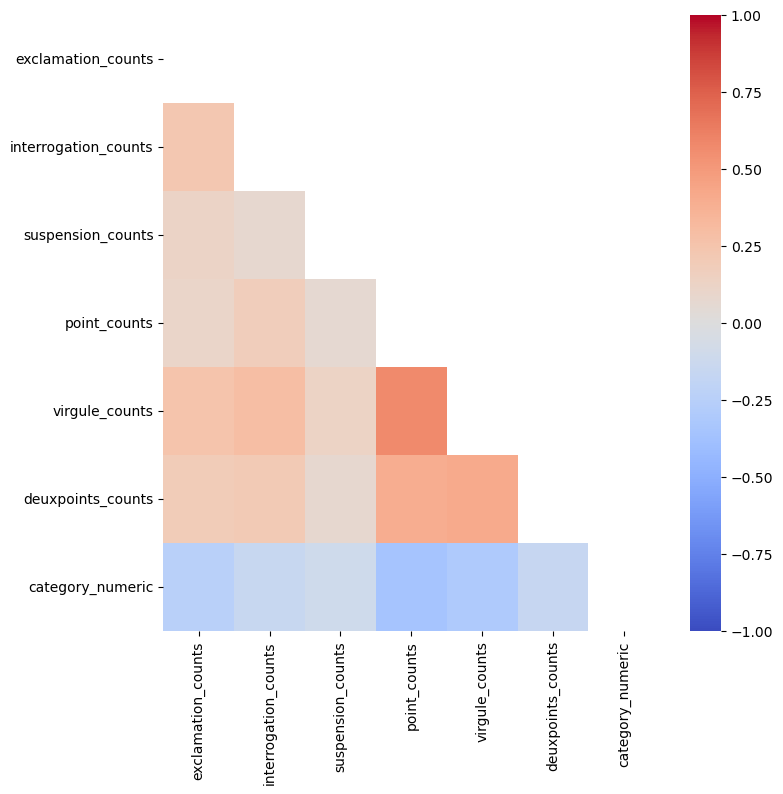

In [22]:
#Graphique avec les coefficients de corrélation simple entre variables
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ig, ax = plt.subplots(figsize=(8,8)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot = True,   
            vmin=-1, 
            vmax=1, 
            center= 0, 
            cmap= 'coolwarm', 
            mask=matrix, 
            annot_kws={"fontsize":8})

In [23]:
#on sépare la variable cible et les variables explicatives
feats=df.drop('category_numeric',axis=1)
target=df['category_numeric']

In [24]:
from sklearn.model_selection import train_test_split

#Division de l'ensemble de données en un ensemble d'entraînement et un ensemble de test. 
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.3, random_state=42)

In [32]:
feats.describe()

,exclamation_counts,interrogation_counts,suspension_counts,point_counts,virgule_counts,deuxpoints_counts
count,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000,12650.000000
mean,0.972490,0.140632,0.048696,2.265375,2.065059,0.171383
std,2.996934,0.765222,0.368968,3.393247,3.844736,0.789810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000
max,89.000000,22.000000,10.000000,47.000000,63.000000,42.000000


In [25]:
#pas de standardisation nécessaire vue les échelles de données

#on démarre sur une modélisation à partir de l'algorithme SVM (Support Vector Machine)

from sklearn.svm import SVC
#Modèle de classification SVM, en ajoutant l'argument gamma='scale'
svm = SVC(gamma='scale')
#Entraînement du modèle sur l'ensemble d'entraînement
svm.fit(X_train, y_train)
#Affichage du score sur ensemble de test
print('Score sur ensemble test', svm.score(X_test, y_test))

Score sur ensemble test 0.7620553359683795


In [31]:
print('Score sur ensemble d''entrainement', svm.score(X_train, y_train))
#Il n'y a pas de différence spectaculaire entre l'entraînement et le test donc pas d'overfitting à priori

Score sur ensemble dentrainement 0.7477131564088085


In [26]:
#Prédictions sur l'ensemble de test et stockage dans la variable y_pred
y_pred = svm.predict(X_test)
#Affichage de la matrice de confusion
print(pd.crosstab(y_test, y_pred, colnames=['Predictions']))

Predictions         -1     1
category_numeric            
-1                1384   517
 0                  52    56
 1                 278  1508


In [27]:
#ffichage du rapport de classification de nos prédictions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.73      0.77      1901
           0       0.00      0.00      0.00       108
           1       0.72      0.84      0.78      1786

    accuracy                           0.76      3795
   macro avg       0.51      0.52      0.52      3795
weighted avg       0.75      0.76      0.75      3795



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#les résultats du modèle sont corrects mais il pourrait être amélioré
#On va modéliser sur base d'un algorithme KNN
from sklearn.neighbors import KNeighborsClassifier

#Création du classifieur avec n_neighbors=2
knn=KNeighborsClassifier(n_neighbors=2)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=2)

In [36]:
#Affichage du score sur ensemble de test
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.5277997364953887


In [37]:
#Création du classifieur avec n_neighbors=7
knn=KNeighborsClassifier(n_neighbors=7)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
knn.fit(X_train, y_train)
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.7046113306982872


In [38]:
#Création du classifieur avec n_neighbors=20
knn=KNeighborsClassifier(n_neighbors=20)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
knn.fit(X_train, y_train)
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.7525691699604743


In [39]:
#Création du classifieur avec n_neighbors=30
knn=KNeighborsClassifier(n_neighbors=30)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
knn.fit(X_train, y_train)
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.7575757575757576


In [40]:
#Création du classifieur avec n_neighbors=40
knn=KNeighborsClassifier(n_neighbors=40)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
knn.fit(X_train, y_train)
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.7549407114624506


In [ ]:
#on obtient un score identique qu'avec SVM en prenant un n_neighbors à 20,30 et 40

In [42]:
#on va modéliser sur base de RandomForest
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(max_features='sqrt',min_samples_split=2)
# Entraînement de l'algorithme sur l'ensemble d'entraînement
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
#Affichage du score sur ensemble de test
print('Score sur ensemble test', knn.score(X_test, y_test))

Score sur ensemble test 0.7549407114624506


In [46]:
#recherche des meilleurs paramètres pour le RandomForest
from sklearn.model_selection import GridSearchCV

parametres = {'max_features':[ 'sqrt', 'log2', None], 'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
grid_rf=GridSearchCV(estimator=rf, param_grid=parametres)


In [48]:
# Sauvegarder des résultats dans l'objet grille
grille = grid_rf.fit(X_train,y_train)

In [50]:
#Affichage de toutes les combinaisons possibles d'hyperparamètres
pd.set_option('display.max_rows', None)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

                                               params  mean_test_score
0    {'max_features': 'sqrt', 'min_samples_split': 2}         0.742180
1    {'max_features': 'sqrt', 'min_samples_split': 3}         0.745116
2    {'max_features': 'sqrt', 'min_samples_split': 4}         0.746471
3    {'max_features': 'sqrt', 'min_samples_split': 5}         0.747487
4    {'max_features': 'sqrt', 'min_samples_split': 6}         0.747826
5    {'max_features': 'sqrt', 'min_samples_split': 7}         0.748504
6    {'max_features': 'sqrt', 'min_samples_split': 8}         0.748955
7    {'max_features': 'sqrt', 'min_samples_split': 9}         0.750311
8   {'max_features': 'sqrt', 'min_samples_split': 10}         0.750423
9   {'max_features': 'sqrt', 'min_samples_split': 11}         0.750085
10  {'max_features': 'sqrt', 'min_samples_split': 12}         0.750198
11  {'max_features': 'sqrt', 'min_samples_split': 12}         0.749633
12  {'max_features': 'sqrt', 'min_samples_split': 14}         0.750649
13  {'

In [51]:
# Affichage des meilleurs paramètres de la grille pour notre modèle grid_rf
print(grid_rf.best_params_)

{'max_features': 'sqrt', 'min_samples_split': 17}


In [53]:
#Application du modèle à l'ensemble de test avec les meilleurs paramètres
RandomForestClassifierrf= RandomForestClassifier(max_features='sqrt',min_samples_split=17)
rf.fit(X_test, y_test)
y_pred = rf.predict(X_test)

#Affichez la matrice de confusion
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,-1,0,1
Classe réelle,,,
-1,1388,0,513
0,28,24,56
1,213,0,1573


In [54]:
#Affichage du score du modèle
rf.score(X_test, y_test)

0.7865612648221344

In [ ]:
#Le score de l'algo des K-plus proches voisins avec les meilleurs paramètres est : 78,65%